In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

In [2]:
float("inf")

inf

In [3]:
dataset1 = pd.read_csv('/content/Dataset1.csv')
dataset2 = pd.read_csv('/content/Dataset2.csv')

In [5]:
x1=dataset1['X']
y1=dataset1['Y']
x2=dataset2['X']
y2=dataset2['Y']

ploting dataset1

Text(0, 0.5, 'Y')

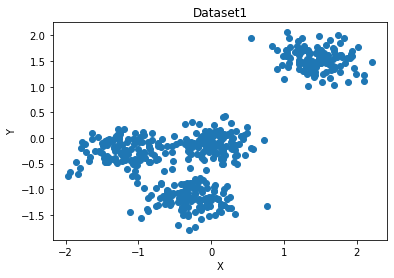

In [6]:
plt.scatter(x1,y1)
plt.title("Dataset1")
plt.xlabel("X")
plt.ylabel("Y")


plotting dataset2

Text(0, 0.5, 'Y')

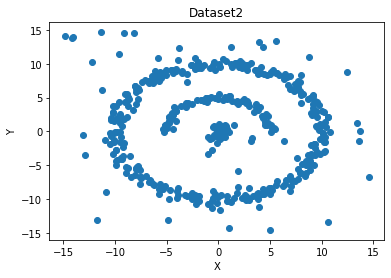

In [7]:
plt.scatter(x2,y2)
plt.title("Dataset2")
plt.xlabel("X")
plt.ylabel("Y")

kmeans with 4 types of criterions
num is the number associated with criterion, if the criterion is centroid_location_unchanged enter any number for num

In [33]:
#convergence criteria is centriod_location_unchanged or centroid_location_small_change or new_points_assigned_small or max_iteration
def kmeans(k,datapoints,convergence_criteria,num):
  cluster=[0] * len(datapoints)
  previous_cluster=[-1] * len(datapoints)
  error=[0]*k
  criteria=False
  #initialize the centroids
  cluster_centers=[]
  for i in range(k):
    cluster_centers += [random.choice(datapoints)]

  iteration=0
  while criteria==False:
    previous_cluster = list(cluster)
    if convergence_criteria=="max_iteration":
      if iteration > num:
        criteria=True
        break
    iteration=iteration+1
    #assign points to cluster
    for p in range(len(datapoints)): #for each point
      min_dist=float("inf")
      distance=[]
      for k in range(len(cluster_centers)):#compute distance with each centroid
        distance=(cluster_centers[k][0]-datapoints[p][0])**2 + (cluster_centers[k][1]-datapoints[p][1])**2
        if (distance < min_dist):
            min_dist = distance  
            cluster[p]=k
    #convergence_criteria=="new_points_assigned_small
    if convergence_criteria=="new_points_assigned_small" :
      new_point_counter=0
      for i in range(k): 
        same_class=0
        for p in range(len(datapoints)):
          if cluster[p]==i and previous_cluster[p]==i:
            same_class=same_class+1
          if same_class >= len(datapoints)-num:
            new_point_counter=new_point_counter+1
      if new_point_counter==k-1:
        criteria=True
        break


    #find new clusters
    new_cluster_centers=[]
    center_similarity=0
    center_difference_small=0
    for k in range(len(cluster_centers)):
      new_x=0
      new_y=0
      for p in range(len(cluster)):
        if cluster[p]==k:
          new_x=new_x+datapoints[p][0]
          new_y=new_y+datapoints[p][1]
      new_cluster_centers.append( (new_x/len(datapoints),new_y/len(datapoints) ) )
    #calculating the error
    for k in range(len(new_cluster_centers)):
      tmp=0
      for p in range(len(cluster)):
        if cluster[p]==k:
          error[k]=error[k]+(new_cluster_centers[k][0]-datapoints[p][0])**2+(new_cluster_centers[k][1]-datapoints[p][1])**2
          tmp=tmp+1
      if tmp !=0:
        error[k]=error[k]/tmp
      else:
        #empty cluster
        error[k]=0


      #for criteri "centriod_location_unchanged":
      if new_cluster_centers[k]==cluster_centers[k]:
        center_similarity=center_similarity+1
      #for criteria centroid_location_small_change
      if (new_cluster_centers[k][0]-cluster_centers[k][0])**2 + (new_cluster_centers[k][1]-cluster_centers[k][1])**2 <= num:
        center_difference_small=center_difference_small+1

    if center_similarity==k-1 and criteria=="centriod_location_unchanged":
      criteria=True
      break
    if center_difference_small==k-1 and criteria=="centriod_location_small_change":
      criteria=True
      break
    cluster_centers=new_cluster_centers 
  #plotting
  colors=10*["r","g","c","b","k","m","y","w"]
  for centroid in cluster_centers:
    plt.scatter(centroid[0],centroid[1],s=130,marker="x")
  for c in range(len(cluster_centers)):
    color=colors[c]
    for p in range(len(datapoints)):
      if cluster[p]==c:
        plt.scatter(datapoints[p][0],datapoints[p][1],color=color,s=30)
  plt.show()

  zero=0
  for i in range(len(error)):
    if error[i]==0:
      zero=zero+1
    print("error of cluster",i,"is",error[i])
  print("clustering error is",sum(error)/(len(error)-zero))

  

      
  return sum(error)/(len(error)-zero)
  #return cluster_centers



In [11]:
datapoints1=[]
for i in range(len(dataset1)):
  tmp=(x1[i],y1[i])
  datapoints1.append(tmp)
#kmeans(2,datapoints1,"max_iteration",2)


kmeans with k=2 and max_iteration=15

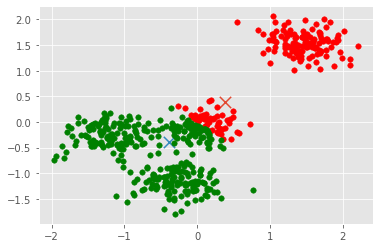

error of cluster 0 is 1.9196084902178068
error of cluster 1 is 0.6630032176120517
clustering error is 1.2913058539149294


1.2913058539149294

In [22]:
kmeans(2,datapoints1,"max_iteration",15)

kmeans with k=3 and max_iteration=15

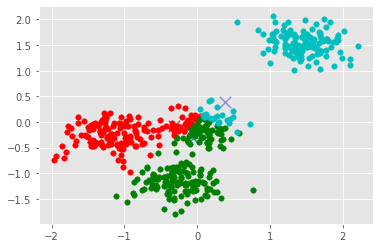

error of cluster 0 is 0.7423679057220627
error of cluster 1 is 0.6397768660972947
error of cluster 2 is 2.2639252221517583
clustering error is 1.2153566646570386


1.2153566646570386

In [23]:
kmeans(3,datapoints1,"max_iteration",20)

kmeans with k=4 and max_iteration=15

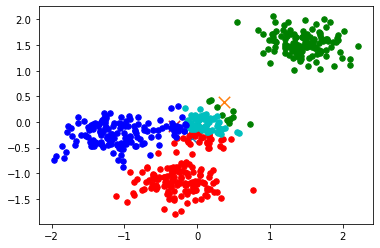

error of cluster 0 is 0.7616339084333611
error of cluster 1 is 2.465890638327441
error of cluster 2 is 0.05161176667469125
error of cluster 3 is 0.8048674247700878
clustering error is 1.0210009345513953


In [41]:
kmeans(4,datapoints1,"max_iteration",20)

estimating error for 0<k<15

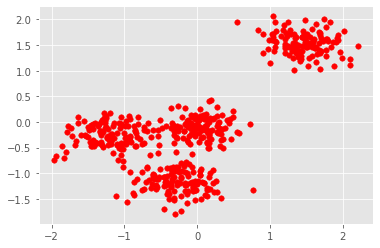

error of cluster 0 is 2.0040080160320604
clustering error is 2.0040080160320604


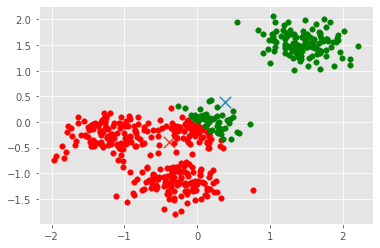

error of cluster 0 is 0.6630032176120517
error of cluster 1 is 1.9196084902178068
clustering error is 1.2913058539149294


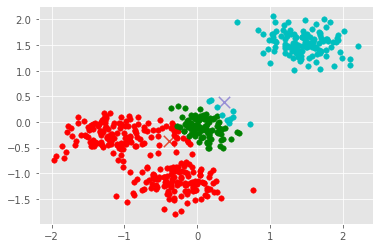

error of cluster 0 is 0.7482732182763894
error of cluster 1 is 0.07950123979808574
error of cluster 2 is 2.465890638327441
clustering error is 1.0978883654673053


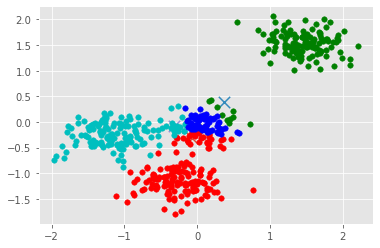

error of cluster 0 is 0.7560617088059802
error of cluster 1 is 2.465890638327441
error of cluster 2 is 0.8109894530189805
error of cluster 3 is 0.05161176667469125
clustering error is 1.0211383917067733


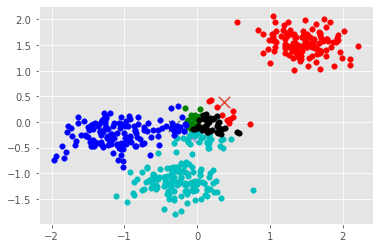

error of cluster 0 is 2.465890638327441
error of cluster 1 is 0.02235991934233969
error of cluster 2 is 0.7560617088059802
error of cluster 3 is 0.8109894530189805
error of cluster 4 is 0.062420607520215755
clustering error is 0.8235444654029915


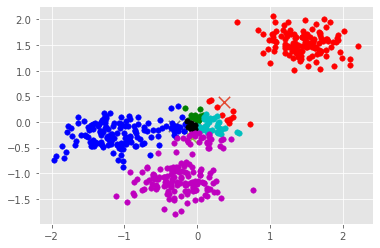

error of cluster 0 is 2.465890638327441
error of cluster 1 is 0.024264701202163005
error of cluster 2 is 0.06735177006993691
error of cluster 3 is 0.8048674247700878
error of cluster 4 is 0.018709190638191174
error of cluster 5 is 0.7616339084333611
clustering error is 0.6904529389068635


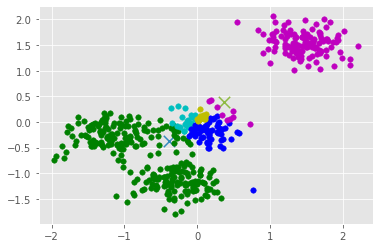

error of cluster 0 is 0
error of cluster 1 is 0.7461438108084875
error of cluster 2 is 0.05708053898986378
error of cluster 3 is 0.1298524716237958
error of cluster 4 is 0
error of cluster 5 is 2.4848123582961907
error of cluster 6 is 0.019209955099134843
clustering error is 0.6874198269634946


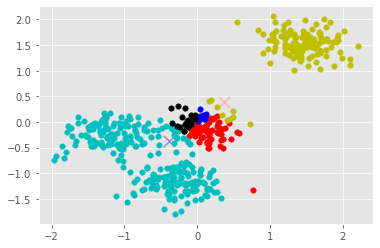

error of cluster 0 is 0.1298524716237958
error of cluster 1 is 0
error of cluster 2 is 0.7461438108084875
error of cluster 3 is 0.019209955103475212
error of cluster 4 is 0.0570805389897547
error of cluster 5 is 0
error of cluster 6 is 2.4848123582961907
error of cluster 7 is 0
clustering error is 0.6874198269643408


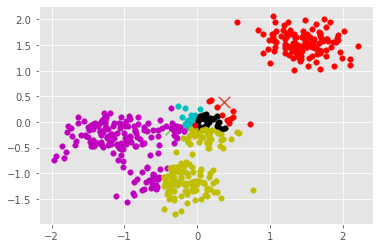

error of cluster 0 is 2.465890638327441
error of cluster 1 is 0
error of cluster 2 is 0.037777786212426084
error of cluster 3 is 0
error of cluster 4 is 0.04149671031430666
error of cluster 5 is 0.806803357277196
error of cluster 6 is 0.7062947695384978
error of cluster 7 is 0
error of cluster 8 is 0.14467866403831833
clustering error is 0.7004903209513643


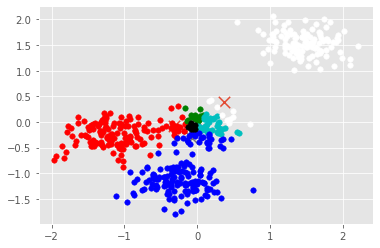

error of cluster 0 is 0.8048674247700878
error of cluster 1 is 0.023770985051548787
error of cluster 2 is 0.06735177006993662
error of cluster 3 is 0.7616339084333611
error of cluster 4 is 0.01883906901670599
error of cluster 5 is 0
error of cluster 6 is 0
error of cluster 7 is 2.465890638327441
error of cluster 8 is 0
error of cluster 9 is 0
clustering error is 0.6903922992781801


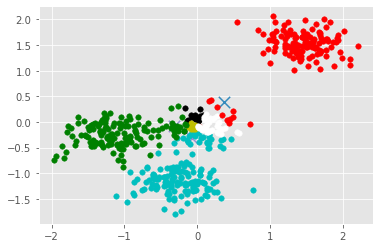

error of cluster 0 is 0
error of cluster 1 is 0
error of cluster 2 is 0.7616339084333611
error of cluster 3 is 0
error of cluster 4 is 0.0237709850457538
error of cluster 5 is 0
error of cluster 6 is 0.018839068944230847
error of cluster 7 is 0.06735177006993691
error of cluster 8 is 2.465890638327441
error of cluster 9 is 0.8048674247700878
error of cluster 10 is 0
clustering error is 0.6903922992651351


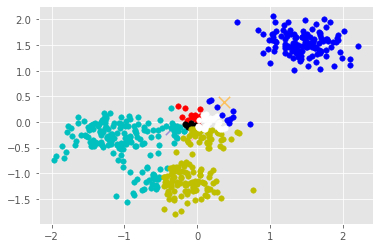

error of cluster 0 is 0.03789037287669147
error of cluster 1 is 0
error of cluster 2 is 0.806803357277196
error of cluster 3 is 0
error of cluster 4 is 0.02017418221842612
error of cluster 5 is 0
error of cluster 6 is 0.7062947695384978
error of cluster 7 is 0.045385461435660766
error of cluster 8 is 0
error of cluster 9 is 0
error of cluster 10 is 0
error of cluster 11 is 2.465890638327441
clustering error is 0.6804064636123188


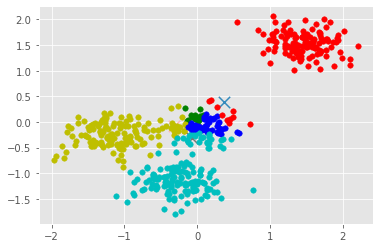

error of cluster 0 is 0
error of cluster 1 is 0.023770985045860473
error of cluster 2 is 0
error of cluster 3 is 0.0673517700699369
error of cluster 4 is 0
error of cluster 5 is 0
error of cluster 6 is 0.8048674247700878
error of cluster 7 is 0
error of cluster 8 is 2.465890638327441
error of cluster 9 is 0
error of cluster 10 is 0.7616339084333611
error of cluster 11 is 0.018839068947940928
error of cluster 12 is 0
clustering error is 0.6903922992657713


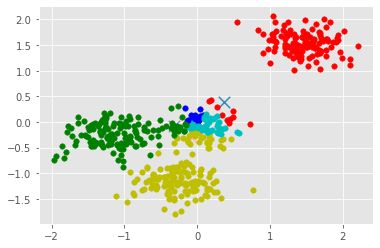

error of cluster 0 is 0
error of cluster 1 is 0
error of cluster 2 is 0.018839068944879696
error of cluster 3 is 0.023770985051819005
error of cluster 4 is 0
error of cluster 5 is 0
error of cluster 6 is 0.7560617088059802
error of cluster 7 is 0
error of cluster 8 is 2.465890638327441
error of cluster 9 is 0.8109894530189805
error of cluster 10 is 0.06735177006993691
error of cluster 11 is 0
error of cluster 12 is 0
error of cluster 13 is 0
clustering error is 0.6904839373698396


In [34]:
error=[0]*14
for i in range(1,15):
  error[i-1]=kmeans(i,datapoints1,"max_iteration",15)

elbow method

[2.0040080160320604, 1.2913058539149294, 1.0978883654673053, 1.0211383917067733, 0.8235444654029915, 0.6904529389068635, 0.6874198269634946, 0.6874198269643408, 0.7004903209513643, 0.6903922992781801, 0.6903922992651351, 0.6804064636123188, 0.6903922992657713, 0.6904839373698396]


Text(0, 0.5, 'cluster error')

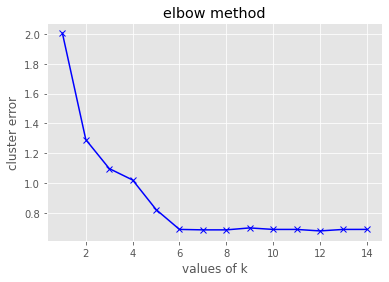

In [35]:
print(error)
plt.plot(range(1,15),error,"bx-")
plt.title("elbow method")
plt.xlabel("values of k")
plt.ylabel("cluster error")

k-means for dataset2

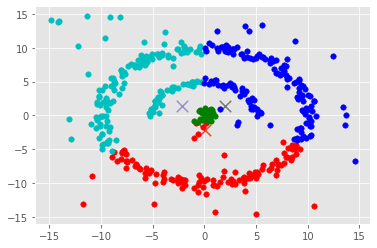

error of cluster 0 is 73.63029492260614
error of cluster 1 is 0.6261463370679085
error of cluster 2 is 61.58659219578893
error of cluster 3 is 55.90118372220431
clustering error is 47.93605429441682


47.93605429441682

In [36]:
datapoints2=[]
for i in range(len(dataset2)):
  tmp=(x2[i],y2[i])
  datapoints2.append(tmp)
kmeans(4,datapoints2,"max_iteration",15)